In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import csv


from mpl_toolkits.mplot3d import axes3d 

In [45]:
directions_truth = []
with open('directions_truth.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        directions_truth.append(arr)
        

directions_reco = []
with open('directions_reco.txt', 'r', newline='') as f:
    for line in f:
        sl_reco = line.split(',')
        arr_reco = np.array([float(sl_reco[0]), float(sl_reco[1]), float(sl_reco[2])])
        directions_reco.append(arr_reco)
        
startpoints_truth = []
with open('startpoints_truth.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        startpoints_truth.append(arr)

startpoints_reco = []
with open('startpoints_reco.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        startpoints_reco.append(arr)
        
endpoints_truth = []
with open('endpoints_truth.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        endpoints_truth.append(arr)

endpoints_reco = []
with open('endpoints_reco.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        endpoints_reco.append(arr)

direction_dot = []
for k in range(100):
    direction_dot.append(np.dot(directions_reco[k], directions_truth[k]))

index_of_0_99 = []
for k in range(100):
    if direction_dot[k] >= 0.99:
        index_of_0_99.append(k)

In [40]:

from sklearn.preprocessing import normalize

i=16
x = np.array([directions_truth[i][0], directions_truth[i][1], directions_truth[i][2]])
norm1 = x / np.linalg.norm(x)
norm2 = normalize(x[:,np.newaxis], axis=0).ravel()
print(np.all(norm1 == norm2))

True


In [41]:
norm1

array([ 0.59638015,  0.20679505, -0.7756072 ])

In [42]:
x

array([ 0.59638 ,  0.206795, -0.775607])

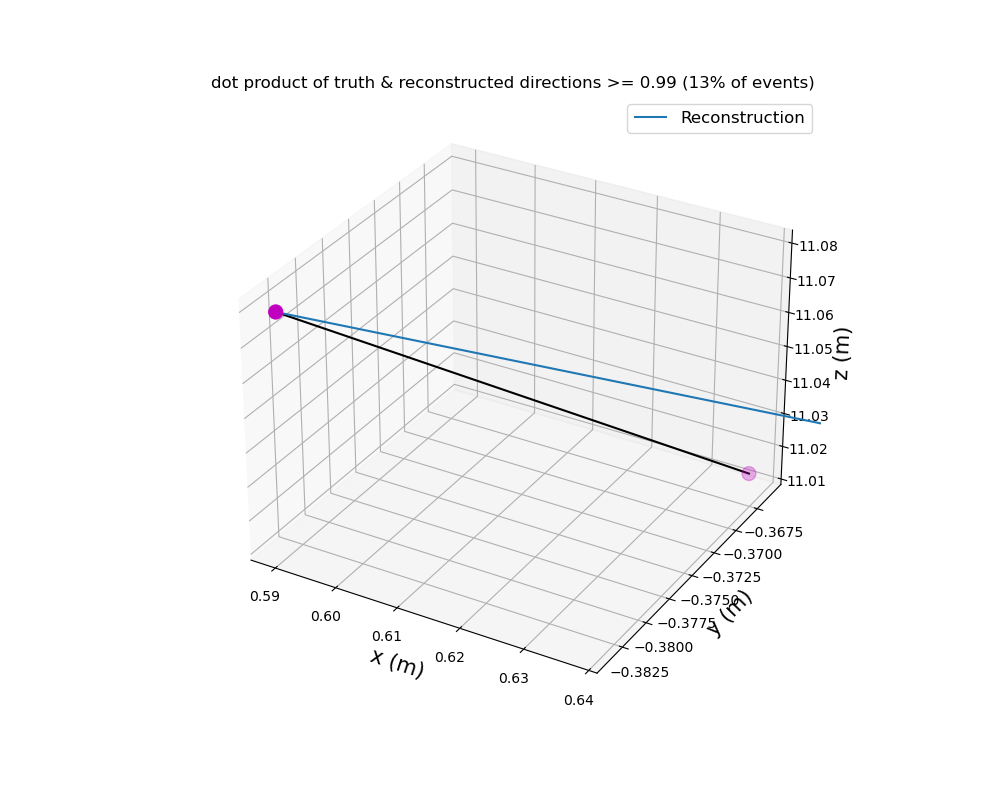

In [31]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

#i = index_of_0_99[0]
i=16
ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2],label='Reconstruction')
#ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r',label='MC Truth')

ax.scatter([startpoints_reco[i][0]/100, endpoints_reco[i][0]/100], [startpoints_reco[i][1]/100, endpoints_reco[i][1]/100], [startpoints_reco[i][2]/100, endpoints_reco[i][2]/100], c='m', s=100)
ax.plot([startpoints_reco[i][0]/100, endpoints_reco[i][0]/100], [startpoints_reco[i][1]/100, endpoints_reco[i][1]/100], [startpoints_reco[i][2]/100, endpoints_reco[i][2]/100], color='black')
#test = 16
#ax.quiver(startpoints_truth[test][0]/100, startpoints_truth[test][1]/100, startpoints_truth[test][2]/100, directions_truth[testendpoints_reco][0], directions_truth[test][1], directions_truth[test][2],color='m',label='MC Truth')

#for i in index_of_0_99:
    #ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2])
    #ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r')
    
    #ax.scatter([startpoints_reco[i][0]/100, endpoints_reco[i][0]/100], [startpoints_reco[i][1]/100, endpoints_reco[i][1]/100], [startpoints_reco[i][2]/100, endpoints_reco[i][2]/100], c='m', s=1)
    #ax.plot([startpoints_reco[i][0]/100, endpoints_reco[i][0]/100], [startpoints_reco[i][1]/100, endpoints_reco[i][1]/100], [startpoints_reco[i][2]/100, endpoints_reco[i][2]/100], color='black')
    
    
    
    
ax.set_xlabel("x (m)", fontsize=15)
ax.set_ylabel("y (m)", fontsize=15)
ax.set_zlabel("z (m)", fontsize=15)
ax.set_title("dot product of truth & reconstructed directions >= 0.99 (" + str(len(index_of_0_99)) + "% of events)", fontsize=12)
ax.legend(fontsize=12)
plt.show()


In [9]:
startpoints_reco[0][2]


1170.52